Q1. Fitting synthetic data using the perceptron learning algorithm.

In [96]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline

# Specify size of plot
pl.rcParams['figure.figsize'] = (12.0, 10.0)

# Playing around with the linear perceptron algorithm


The linear perceptron algorithm can be used to classify data points according to pre-selected features they have. The idea is to find a curve (or hyperplane) that separates points with different features. Once we have the curve, we can use it to decide if future points are of feature A or B based on where they are with respect to the curve (above or below it).

Now, let generate a collection of points and then paint them according to a line. If the points are above the line, they are blue, if they are below, green.

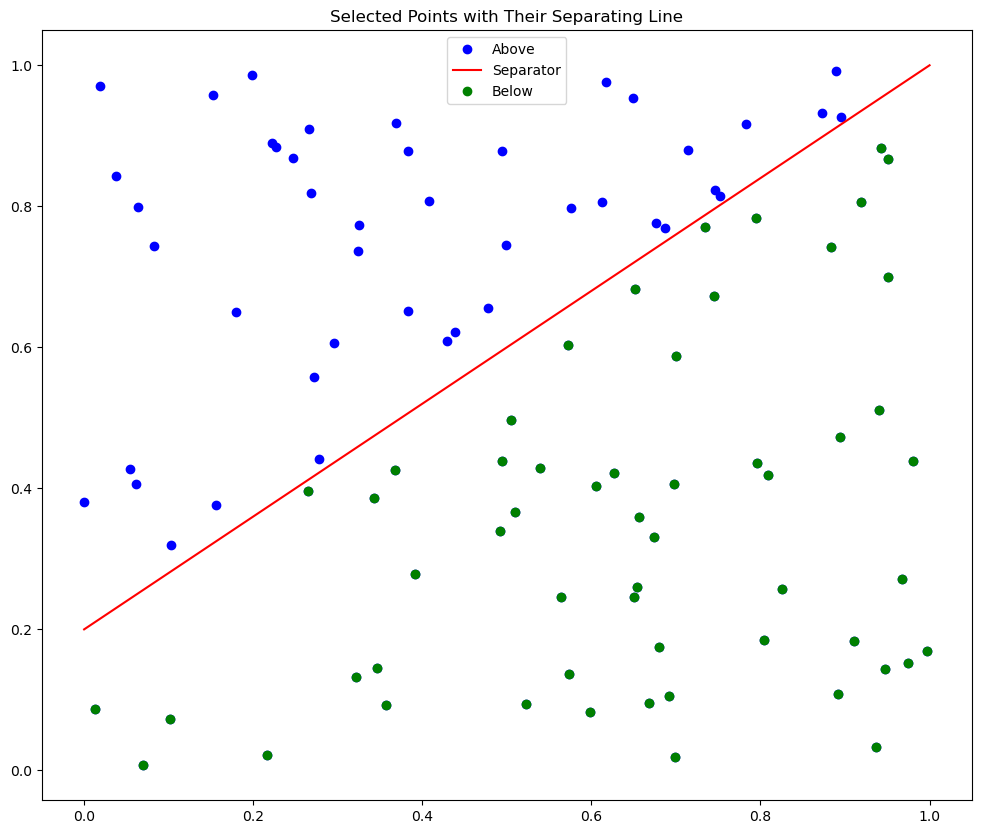

In [100]:
N = 100  
xn = nr.rand(N, 2) 
x = np.linspace(0, 1)
a, b = 0.8, 0.2
f = lambda x: a * x + b  

fig = pl.figure()
figa = pl.gca()

pl.plot(xn[:, 0], xn[:, 1], 'bo')  
pl.plot(x, f(x), 'r')  

yn = np.zeros([N, 1])
for i in range(N):
    if f(xn[i, 0]) > xn[i, 1]:  
        yn[i] = 1
        pl.plot(xn[i, 0], xn[i, 1], 'go')
    else:  
        yn[i] = -1

pl.legend(['Above', 'Separator', 'Below'], loc=0)
pl.title("Selected Points with Their Separating Line")

pl.show()


The curve naturally separates the space into two regions, one of green points and one of blue points. Thus, if I am given a new point, I can assign it a color based on where it is with respect to the curve. It is really that simple.

What is not so simple is to find the curve given the points. However, if the points are linearly separable, i.e. if a line exists that does the job, then I can just move a line around until I get it to the correct position. This is what the linear perceptron algorithm is doing.

In [103]:
def perceptron(xn, yn, max_iter=5, w=np.zeros(3)):
    
    N = xn.shape[0]
    
    f = lambda x: np.sign(w[0] + w[1] * x[0] + w[2] * x[1])
    for iteration in range(max_iter):
        i = nr.randint(N)  

        predicted_label = f(xn[i, :]) 
        actual_label = yn[i].item()  

       
        print(f"{i} {xn[i,0]} {xn[i,1]} {predicted_label} {actual_label}")

       
        if actual_label != predicted_label:
            w[0] = w[0] + actual_label 
            w[1] = w[1] + actual_label * xn[i, 0]  
            w[2] = w[2] + actual_label * xn[i, 1]  

    return w

w_final = perceptron(xn, yn, max_iter=5)
w_final


52 0.6916469096639316 0.10552375193152153 0.0 1.0
70 0.22216400661014568 0.8896416393183847 1.0 -1.0
94 0.06917956002783066 0.007254166789703587 1.0 1.0
6 0.2961223782564534 0.60549277685276 -1.0 -1.0
0 0.654137953614509 0.26051153879543476 1.0 1.0


array([ 0.        ,  0.4694829 , -0.78411789])

Now that we have an implementation, let's see how close it gets.

28 0.32103177592926324 0.13292118107016782 1.0 1.0
96 0.43850364752544724 0.6215331928565931 -1.0 -1.0
57 0.9188597706357238 0.8062338607522807 1.0 1.0
68 0.8043694080103451 0.18441166371590612 1.0 1.0
66 0.809256592499097 0.4192553665982276 1.0 1.0


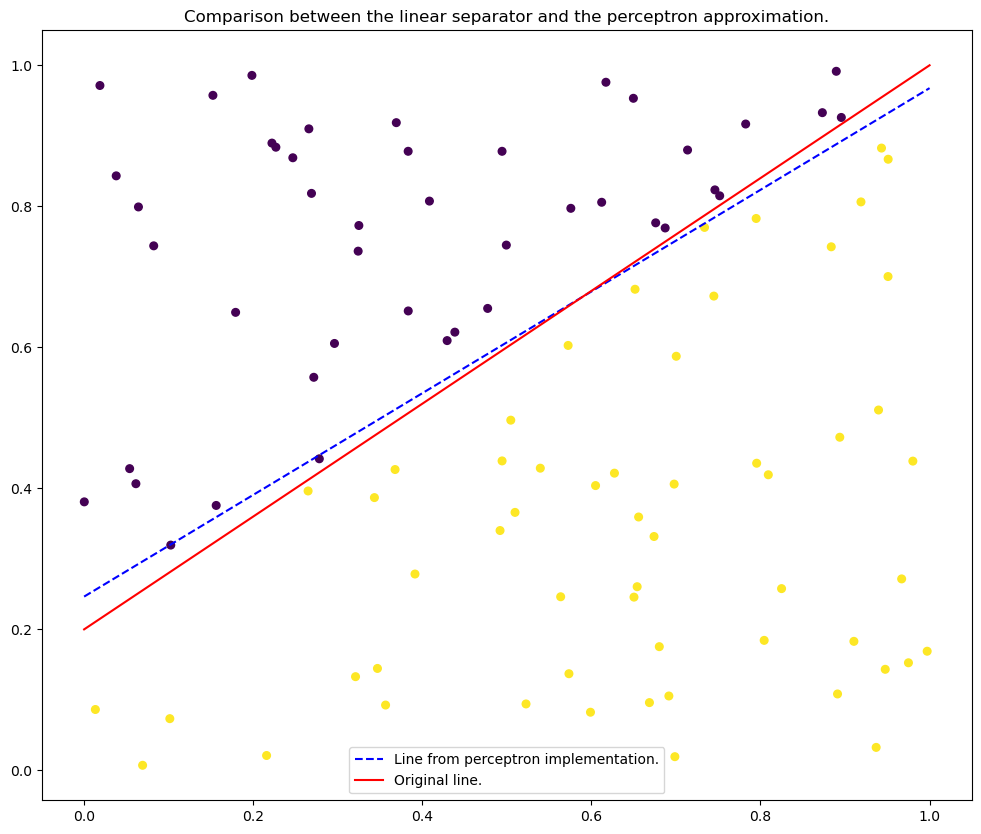

In [170]:

w = perceptron(xn, yn) 
bnew = -w[0] / w[2]
anew = -w[1] / w[2]
y = lambda x: anew * x + bnew
sep_color = (yn + 1) / 2.0 

pl.figure()
figa = pl.gca()

pl.scatter(xn[:, 0], xn[:, 1], c=sep_color, s=30)
pl.plot(x, y(x), 'b--', label='Line from perceptron implementation.')
pl.plot(x, f(x), 'r', label='Original line.')

pl.legend()
pl.title('Comparison between the linear separator and the perceptron approximation.')
pl.show()


Not bad, right? The algorithm should have managed to converge to a good approximation of the separating line. If it didn't, try running the last piece of code again. Remember that this implementation updates randomly picked points, so in some cases convergence will be worse.

Also, note that the line that separates the points is not unique, given the dataset we have available. Would it be so if we had all of the possible information? My guess is that this depends on the data.

In any case, it can be proven that this process works every time, given a sufficient number of steps. This assumes that the data is linearly separable, a fact that is quite powerful on its own. We may be good at finding patterns in $\mathbb{R}^2$ but what about $\mathbb{R}^d$? Is there a way to show that a collection of points can be separated by "inserting" planes between them? We take a look at that next.

# What if the dataset is not linearly separable?

If the data is not separable by a line, then, in most cases, this process will not work perfectly. Some points will be classified correctly and some will not. Then, we can think about two more questions.

1. How much will it cost us if we missclassify a point? Is the cost an extra spam e-mail in our inbox or is it a patient not getting the correct medicine?
2. If we don't want to take the risk with a line, which is the best curve to use instead?

We are not going to answer those here. Instead, I will just show you an example where the classification can fail, if the points are not separable by a line. Then, if you download this notebook, you can try with other curves and see what happens.

Remember that, in our case, given a point $x=(x_1,x_2)$, classification is done according to $\text{sign}(f(x_1)-x_2)$, which can either be -1 or 1.

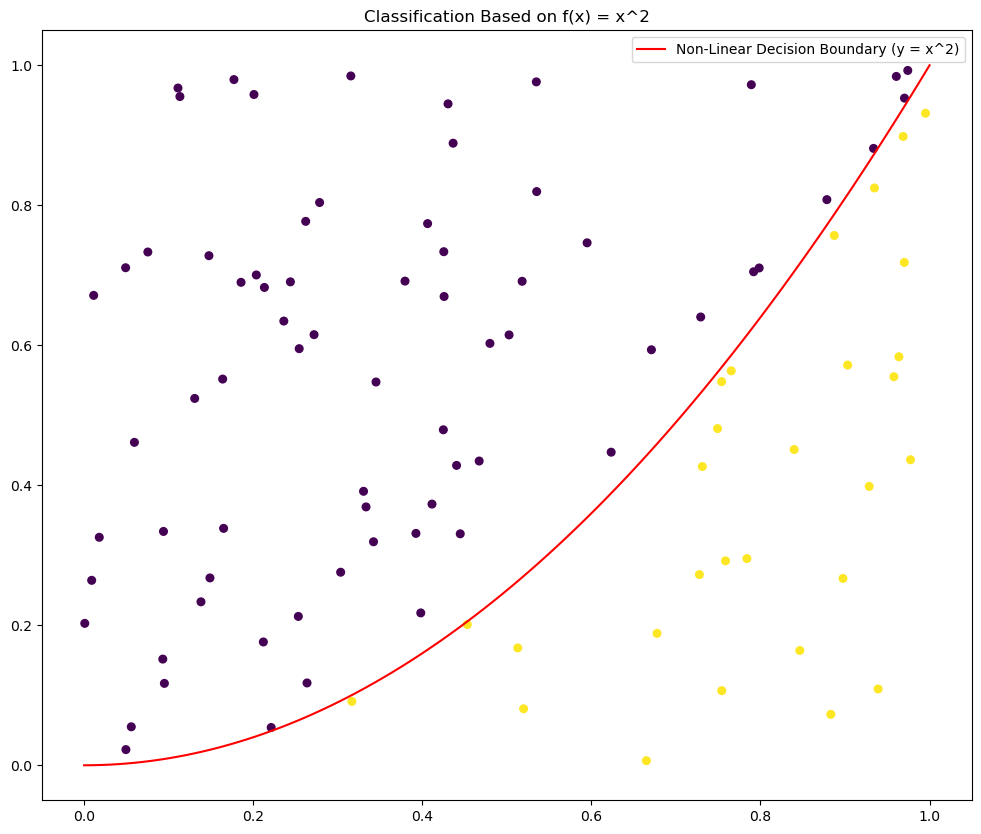

In [180]:
f = lambda x: x**2  

x = np.linspace(0, 1, 100)
N = 100  
xn = nr.rand(N, 2)  

fig = pl.figure()
figa = pl.gca()

pl.plot(x, f(x), 'r', label="Non-Linear Decision Boundary (y = x^2)")
yn = np.sign(f(xn[:, 0]) - xn[:, 1]) 

colors = (yn + 1) / 2.0  
pl.scatter(xn[:, 0], xn[:, 1], c=colors, s=30)
pl.title('Classification Based on f(x) = x^2')
pl.legend()

pl.show()


In this example, we can see that $x^2$ colours some points as black and others as white. Let us find a linear separator now.

99 0.9347940070078894 0.824724548086842 1.0 1.0
55 0.14763826773934563 0.7279771688215474 -1.0 -1.0
53 0.7277363451698213 0.2724512950862472 1.0 1.0
57 0.4248881820307039 0.47927760477487935 -1.0 -1.0
62 0.765444689003658 0.5634855675600365 1.0 1.0
77 0.4672752528774172 0.43465870927122485 1.0 -1.0
43 0.0007693924055770518 0.20273241031156175 -1.0 -1.0
99 0.9347940070078894 0.824724548086842 1.0 1.0
13 0.6650788903025321 0.006556185568325268 1.0 1.0
56 0.25439505368422854 0.5951597535264113 -1.0 -1.0
96 0.7984555036611238 0.7104388571808364 1.0 -1.0
52 0.7586616029052851 0.2920747060065003 1.0 1.0
58 0.9606625208542826 0.9840851705337911 -1.0 -1.0
59 0.04908619124208702 0.7107721682198157 -1.0 -1.0
5 0.995216871938984 0.9314498508091061 -1.0 1.0
98 0.7540494993500563 0.5480962625844443 1.0 1.0
69 0.017922325168572617 0.3256846288315529 -1.0 -1.0
65 0.42541945403631776 0.7336845383764244 -1.0 -1.0
1 0.00895848338692995 0.26421065725703274 -1.0 -1.0
34 0.7839551750980809 0.29532158052931

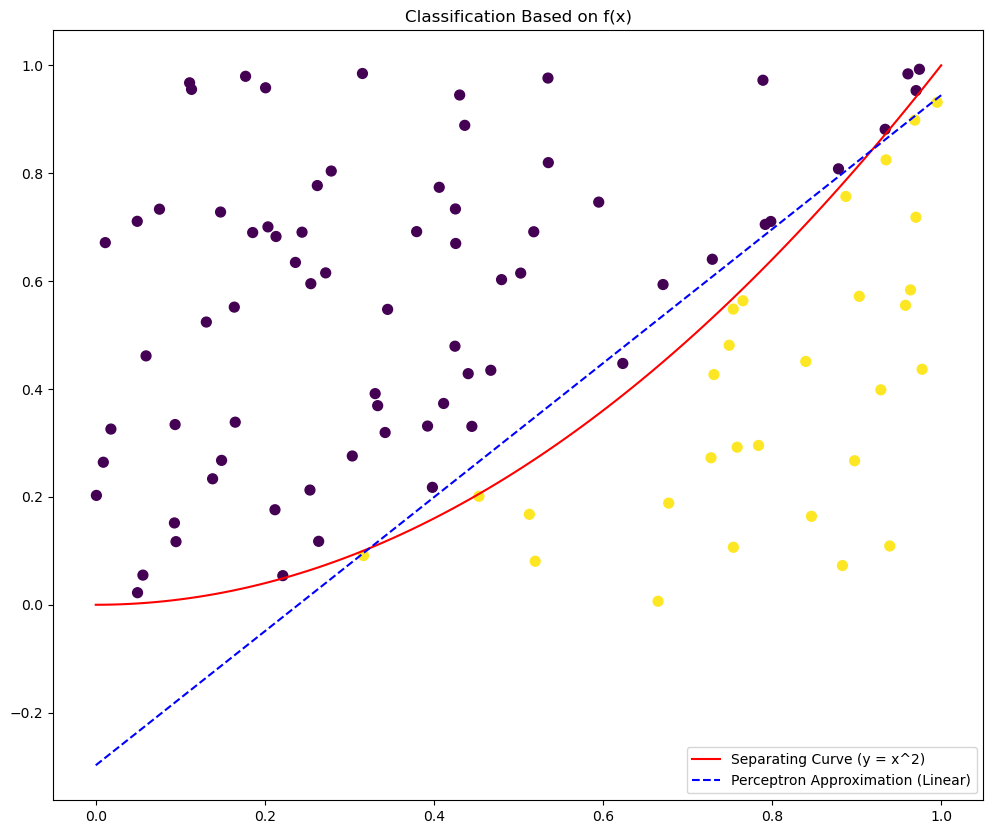

In [186]:
w = perceptron(xn, yn, max_iter=1000)

if w[2] != 0:
    bnew = -w[0] / w[2]
    anew = -w[1] / w[2]
    y = lambda x: anew * x + bnew  

    figa = pl.gca()

    pl.scatter(xn[:, 0], xn[:, 1], c=colors, s=50)

    pl.plot(x, f(x), 'r', label="Separating Curve (y = x^2)")

    pl.plot(x, y(x), 'b--', label="Perceptron Approximation (Linear)")

    pl.title('Classification Based on f(x)')
    pl.legend()

    pl.show()
else:
    print("Perceptron failed to find a valid decision boundary (w[2] = 0).")


In this case, our classifier cannot get all the cases right (white points should be above the blue line, black points below). This situation will probably become worse as we add more and more points.

Q2. Try polynomials of order 3 and 5 and try to fit them using a perceptron learning algorithm.



14 0.881212582222589 0.42717810813384394 1.0 1.0
60 0.8706805033096116 0.5131427877416894 1.0 1.0
96 0.18358277571165404 0.571837822093146 -1.0 -1.0
72 0.6714237730197928 0.5283904570768962 1.0 -1.0
17 0.4683948546187525 0.5750094316161752 -1.0 -1.0
46 0.23804205959971814 0.06813000722839868 -1.0 -1.0
4 0.6356951243922148 0.7846295331688835 -1.0 -1.0
96 0.18358277571165404 0.571837822093146 -1.0 -1.0
87 0.7112789772079985 0.8862416837608513 -1.0 -1.0
66 0.9302367151032931 0.4481637004399892 1.0 1.0
33 0.9708254001443098 0.6755782763621653 1.0 1.0
64 0.4383869215377215 0.9184546227426993 -1.0 -1.0
17 0.4683948546187525 0.5750094316161752 -1.0 -1.0
35 0.5734953734979985 0.970600577953291 -1.0 -1.0
22 0.2564308761810914 0.40595729404802483 -1.0 -1.0
13 0.22296988372257132 0.9922873740027686 -1.0 -1.0
4 0.6356951243922148 0.7846295331688835 -1.0 -1.0
33 0.9708254001443098 0.6755782763621653 1.0 1.0
93 0.6225716820755284 0.9516673275285155 -1.0 -1.0
79 0.996303579795967 0.5397841732140777 1

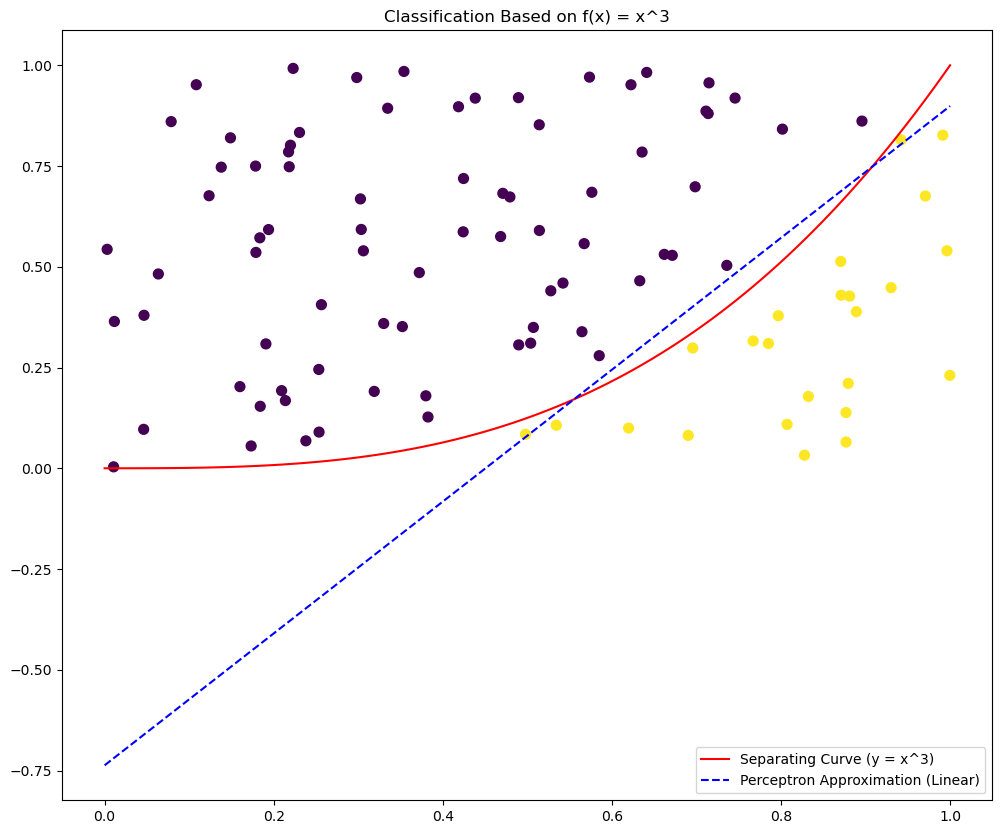

In [188]:
f_cubic = lambda x: x**3  

x = np.linspace(0, 1, 100)

N = 100  
xn = nr.rand(N, 2)  

yn = np.sign(f_cubic(xn[:, 0]) - xn[:, 1])  

colors = (yn + 1) / 2.0  

w = perceptron(xn, yn, max_iter=1000)

if w[2] != 0:
    bnew = -w[0] / w[2]
    anew = -w[1] / w[2]
    y = lambda x: anew * x + bnew 

    figa = pl.gca()

    pl.scatter(xn[:, 0], xn[:, 1], c=colors, s=50)

    pl.plot(x, f_cubic(x), 'r', label="Separating Curve (y = x^3)")

    pl.plot(x, y(x), 'b--', label="Perceptron Approximation (Linear)")

    pl.title('Classification Based on f(x) = x^3')
    pl.legend()

    pl.show()
else:
    print("Perceptron failed to find a valid decision boundary (w[2] = 0).")


62 0.3243390616215802 0.3699776539769273 -1.0 -1.0
90 0.03279703047052107 0.3934298680866606 -1.0 -1.0
10 0.4722704858557111 0.11296148235499037 -1.0 -1.0
7 0.13194429130703067 0.16257005453968576 -1.0 -1.0
12 0.09593854810120483 0.20130936134427568 -1.0 -1.0
62 0.3243390616215802 0.3699776539769273 -1.0 -1.0
52 0.3321393675380052 0.8505555421243503 -1.0 -1.0
19 0.5777636332808386 0.6035078207335345 -1.0 -1.0
58 0.5396853314556359 0.09682358868128493 1.0 -1.0
27 0.2024179847020915 0.7545532134426653 -1.0 -1.0
80 0.5683308429318076 0.4502048985878754 -1.0 -1.0
6 0.7762707315563283 0.805210635228978 -1.0 -1.0
56 0.5708885131367661 0.8754075534233245 -1.0 -1.0
2 0.4718785830107862 0.7793696840089759 -1.0 -1.0
53 0.3458949772730596 0.6403715808396356 -1.0 -1.0
13 0.031441194109895654 0.8622550444697644 -1.0 -1.0
13 0.031441194109895654 0.8622550444697644 -1.0 -1.0
79 0.9920355926636758 0.4225445927600796 1.0 1.0
1 0.7260158193218749 0.7869520466701752 -1.0 -1.0
61 0.7398410796683323 0.0282

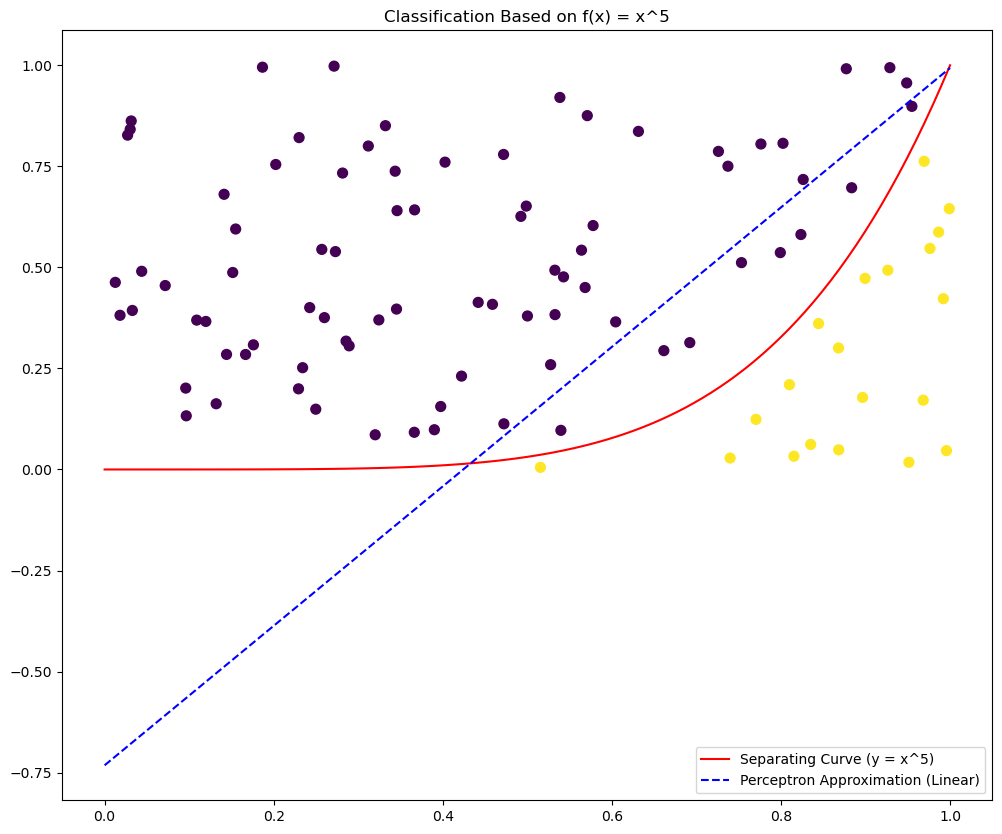

In [190]:
f_xfive = lambda x: x**5  
x = np.linspace(0, 1, 100)

N = 100  
xn = nr.rand(N, 2)  

yn = np.sign(f_xfive(xn[:, 0]) - xn[:, 1]) 

colors = (yn + 1) / 2.0  

w = perceptron(xn, yn, max_iter=1000)

if w[2] != 0:
    bnew = -w[0] / w[2]
    anew = -w[1] / w[2]
    y = lambda x: anew * x + bnew  

    figa = pl.gca()

    pl.scatter(xn[:, 0], xn[:, 1], c=colors, s=50)
    pl.plot(x, f_xfive(x), 'r', label="Separating Curve (y = x^5)")
    pl.plot(x, y(x), 'b--', label="Perceptron Approximation (Linear)")

    pl.title('Classification Based on f(x) = x^5')
    pl.legend()
    pl.show()
else:
    print("Perceptron failed to find a valid decision boundary (w[2] = 0).")
